In [14]:
import requests
from datetime import datetime, timedelta
from urllib.parse import urlencode
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
BASE_URL = "https://data.mitwelten.org/api/v3/"

In [5]:
url = f"{BASE_URL}sensordata/pax_locations"
res = requests.get(url).json()
pax_deployments = [r.get("deployment_id") for r in res]
pax_deployments

[1491,
 92,
 2044,
 1753,
 32,
 865,
 1464,
 2129,
 19,
 1540,
 1760,
 1840,
 2092,
 1382,
 1663,
 1917,
 1577,
 1406,
 754,
 90,
 1431,
 80,
 2066,
 94,
 1571,
 26,
 1589]

In [7]:
# get daily pax values
DEPLOYMENT_ID = 1491
url = f"{BASE_URL}sensordata/pax/{DEPLOYMENT_ID}"
res = requests.get(url).json()
res.keys()

dict_keys(['buckets', 'pax'])

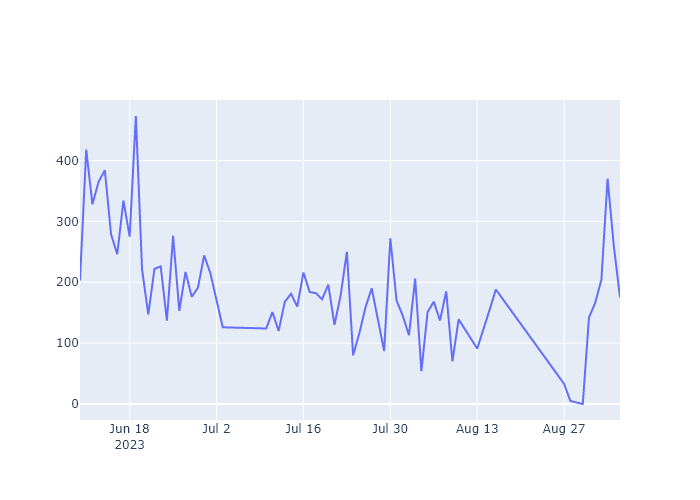

In [8]:
fig = go.Figure(go.Scatter(x=res.get("buckets"),y=res.get("pax")))
fig.show("png")

In [11]:
# time of day
url = f"{BASE_URL}sensordata/pax/{DEPLOYMENT_ID}/time_of_day?bucket_width_m=60"
res = requests.get(url).json()
res.keys()

dict_keys(['minuteOfDay', 'pax'])

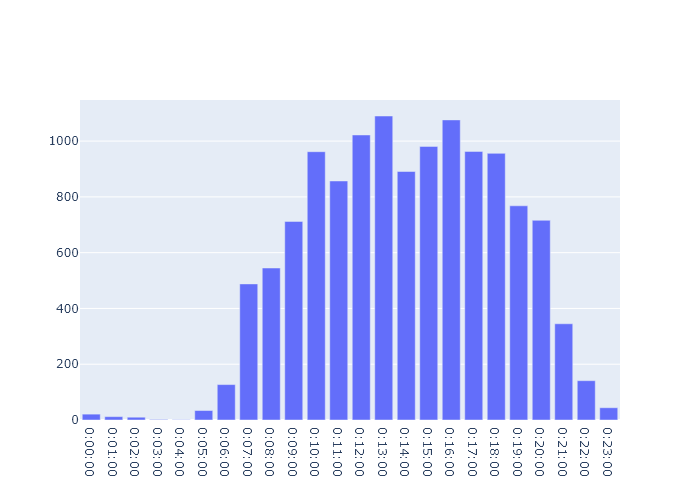

In [16]:
fig = go.Figure(
    go.Bar(
        x=[str(timedelta(seconds=s)) for s in res.get("minuteOfDay")], y=res.get("pax")
    )
)
fig.show("png")
